In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

D:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [5]:
model = Sequential()

model.add(Embedding(max_features, 32))

model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))

model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         16640     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 361,537
Trainable params: 361,537
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 286s 2s/step - loss: 0.4795 - accuracy: 0.7472 - val_loss: 0.2939 - val_accuracy: 0.8804
Epoch 2/5
137/137 [==============================] - 274s 2s/step - loss: 0.2468 - accuracy: 0.9073 - val_loss: 0.3161 - val_accuracy: 0.8703
Epoch 3/5
137/137 [==============================] - 476s 3s/step - loss: 0.1564 - accuracy: 0.9458 - val_loss: 0.3393 - val_accuracy: 0.8683
Epoch 4/5
137/137 [==============================] - 474s 3s/step - loss: 0.1095 - accuracy: 0.9643 - val_loss: 0.3662 - val_accuracy: 0.8749
Epoch 5/5
137/137 [==============================] - 351s 3s/step - loss: 0.0731 - accuracy: 0.9789 - val_loss: 0.4357 - val_accuracy: 0.8707


In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


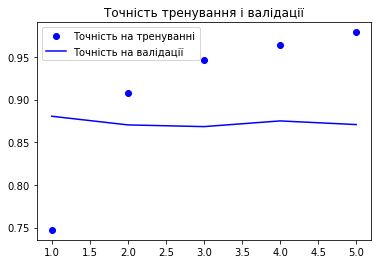

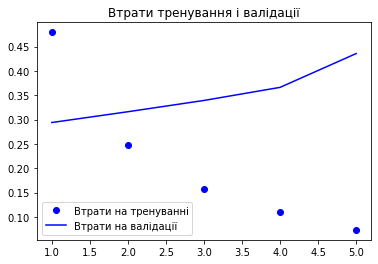

In [11]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_accuracy, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [12]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Accuracy: {:.2f}%'.format(test_acc * 100))

782/782 [==============================] - 44s 56ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 45s 57ms/step - loss: 0.4489 - accuracy: 0.8628
Test Accuracy: 86.28%


In [ ]:
Висновок: Час виконання 5-ти епох - 31 хв. 1 сек. Точність склала 86.3%